In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_boston

In [3]:
#boston data
boston_data = load_boston()

In [4]:
type(boston_data)

sklearn.utils.Bunch

In [6]:
boston_data.data.shape

(506, 13)

In [7]:
boston_data.target.shape

(506,)

In [8]:
print(boston_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [9]:
boston_df = pd.DataFrame(boston_data.data)
boston_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
boston_df.columns = boston_data.feature_names
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [12]:
boston_df['PRICE'] = boston_data.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [13]:
boston_df.shape

(506, 14)

In [14]:
#data for training
x = boston_df.drop('PRICE',axis=1)
y = boston_df['PRICE']

In [17]:
x.shape

(506, 13)

In [18]:
y.shape

(506,)

In [36]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: PRICE, dtype: float64

In [19]:
import seaborn as sns

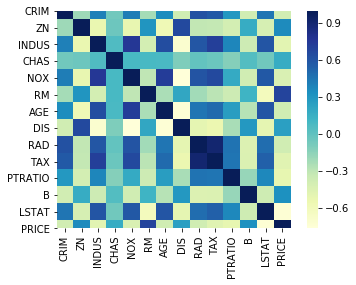

In [25]:
names = []
#creating a correlation matrix
correlations = boston_df.corr()
correlations
sns.heatmap(correlations,square=True,cmap='YlGnBu')
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
#splitting the data into training and test datasets
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [28]:
print([X_train.shape,y_train.shape])

[(379, 13), (379,)]


In [37]:
y_train.head()

182    37.9
155    15.6
280    45.4
126    15.7
329    22.6
Name: PRICE, dtype: float64

In [38]:
y_test.head()

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
Name: PRICE, dtype: float64

In [39]:
X_test.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
173,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.50,9.04
274,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4.0,254.0,17.6,396.90,3.53
491,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07
72,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52
452,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24.0,666.0,20.2,385.09,17.27


In [29]:
from sklearn.linear_model import LinearRegression

In [31]:
#the model
lmodel = LinearRegression()
lmodel

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
#fitting the data to the model
lmodel.fit(X_train,y_train)
lmodel

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
#testing for predictions
y_pred = lmodel.predict(X_test)
y_pred.shape

(127,)

In [44]:
test_df = pd.DataFrame(y_pred,y_test)


In [45]:
test_df.head(10)

,0
PRICE,
23.6,28.838854
32.4,36.007833
13.6,15.083248
22.8,25.230909
16.1,18.878641
20.0,23.213983
17.8,17.593112
14.0,14.305081
19.6,23.054390


In [46]:
test_df.tail(10)

,0
PRICE,
13.9,12.860751
21.8,20.830436
23.7,28.420771
17.6,15.658537
24.4,24.671964
8.8,3.284209
19.2,23.798796
25.3,25.733299
20.4,23.048156


In [47]:
#score
lmodel.score(X_test,y_test)

0.6844267283527108

In [48]:
from sklearn.metrics import mean_squared_error

In [49]:
mean_squared_error(y_test,y_pred)

22.098694827098146